In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers, regularizers
from keras.datasets import mnist

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(
  optimizer='adam', 
  loss='binary_crossentropy'
)

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
history = autoencoder.fit(
  X_train, X_train,
  epochs=50,
  batch_size=256,
  shuffle=True,
  validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 [==============================] - 17s 6ms/step - loss: 0.3855 - val_loss: 0.1986
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1883 - val_loss: 0.1624
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1584 - val_loss: 0.1439
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1416 - val_loss: 0.1321
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1311 - val_loss: 0.1238
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1232 - val_loss: 0.1181
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1178 - val_loss: 0.1139
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1139 - val_loss: 0.1109
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1115 - val_loss: 0.1087
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1094 - val_loss: 0.107

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


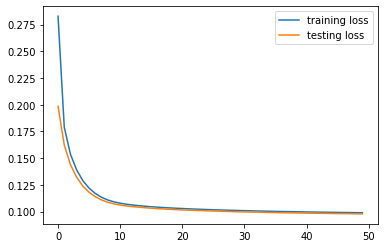

In [10]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="testing loss")
plt.legend();

In [11]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

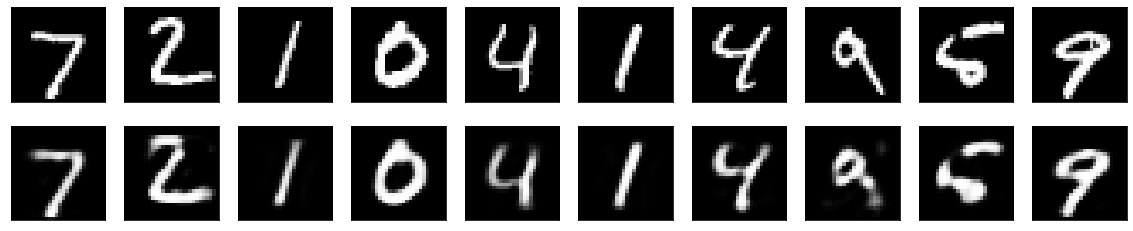

In [12]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
autoencoder.save("model.h5")